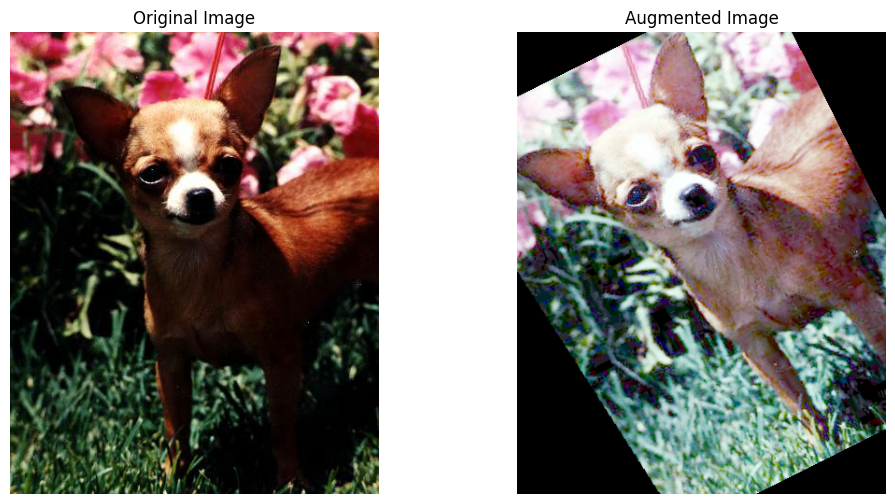

In [53]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from UniformAugment import UniformAugment

# 이미지를 불러오고 AutoAugmentation을 적용할 변환을 정의합니다.
image_path = "./Images/n02085620-Chihuahua/n02085620_10131.jpg"  # 원하는 이미지 파일 경로로 변경
original_image = Image.open(image_path)
transform = transforms.Compose([
    transforms.AutoAugment(policy=transforms.autoaugment.AutoAugmentPolicy.IMAGENET, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.ToTensor()
])
transform.transforms.insert(0, UniformAugment())
# 원본 이미지를 변환합니다.
augmented_image = transform(original_image)

# 원본 이미지와 AutoAugmentation을 적용한 이미지를 시각화합니다.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title("Original Image")
axes[0].imshow(original_image)
axes[0].axis('off')
axes[1].set_title("Augmented Image")
# ToTensor 변환을 통해 이미지 데이터를 [0.0, 1.0] 범위로 정규화하므로 스케일링하지 않습니다.
# 따라서 아래와 같이 시각화합니다.
axes[1].imshow(augmented_image.permute(1, 2, 0).numpy())
axes[1].axis('off')

plt.show()
